# Heart disease prediction

In [ ]:
# importing all the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Loading the data

In [ ]:
data=pd.DataFrame(pd.read_csv("/content/framingham.csv"))

In [ ]:
# printing the first 5 rows
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.shape

(4238, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Checking for missing values

In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Checking correlations

In [ ]:
corr_matrix = data.corr()

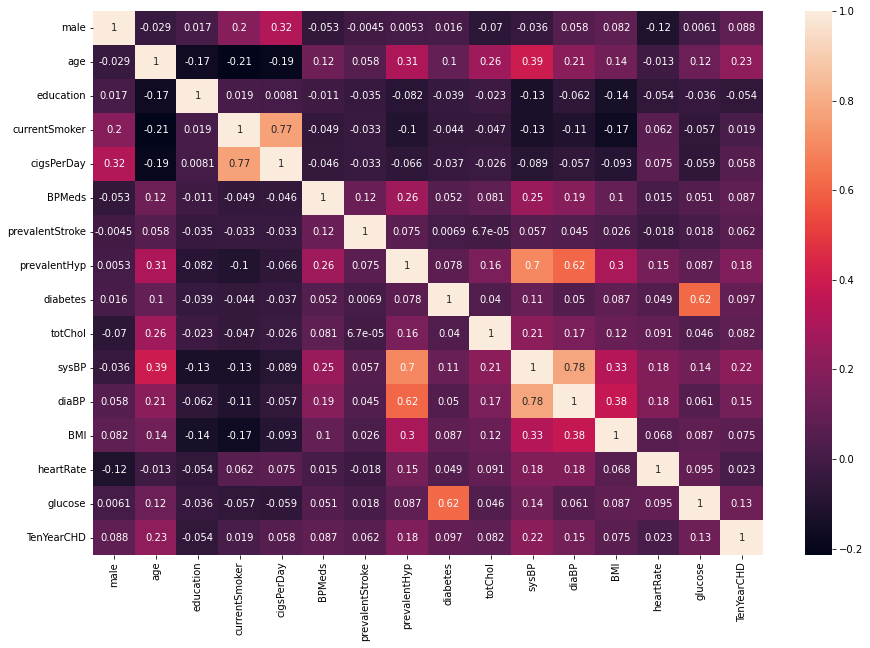

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True)

In [ ]:
corr_matrix['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

Handling missing values

In [ ]:
data= data.drop('education',axis=1)


The education column has missing values. Since we observed that it has a very low correlation with the target values we drop the column.

In [ ]:
data['heartRate'].dropna()

0       80.0
1       95.0
2       75.0
3       65.0
4       85.0
        ... 
4233    66.0
4234    65.0
4235    84.0
4236    86.0
4237    80.0
Name: heartRate, Length: 4237, dtype: float64

In [ ]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

There is one missing value in heartRate so we drop the row that contains the null value.

In [ ]:
data[data['heartRate'].isnull()]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [ ]:
data=data.drop(data.index[689])

In [ ]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.shape

(4237, 15)

Handling the rest of the missing values by filing it with mean values.

In [ ]:
def replace_with_mean(column_name):
  mean_value=data[column_name].mean()
  data[column_name].fillna(value=mean_value, inplace=True)

In [ ]:
missing_values_column=['cigsPerDay','BPMeds','totChol','BMI','glucose']

for x in range(0,len(missing_values_column)):
  replace_with_mean(missing_values_column[x])

In [ ]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

data visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f366b5140d0>,
      dtype=object)

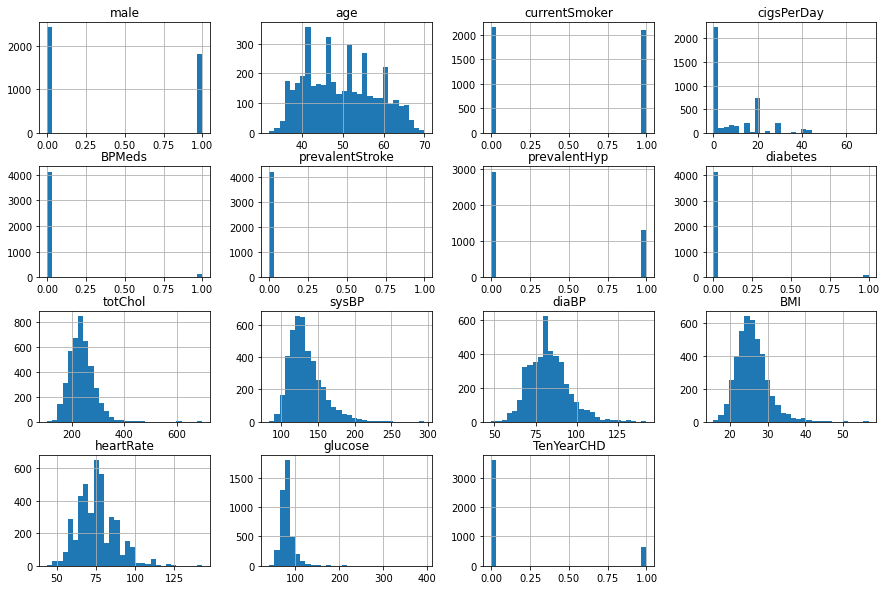

In [ ]:
data.hist(bins=30,figsize=[15,10])

Checking for outliers

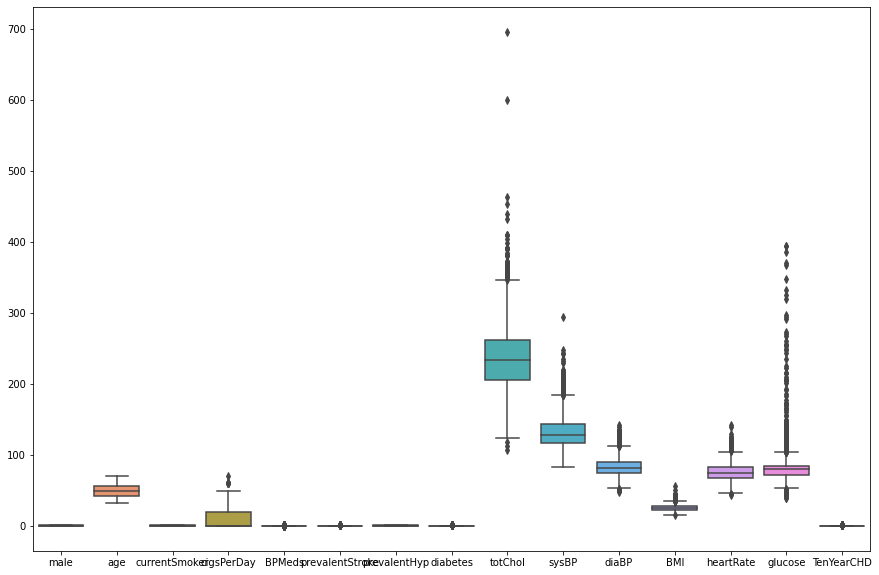

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

Removing outliers

In [ ]:
def remove_outlier_IQR(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    df_final=series[~((series<(Q1-1.5*IQR)) | (series>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
data_outlier=data.drop("TenYearCHD",axis=1)
col_name=(data_outlier.columns.values)
print(col_name)
for i in range (0,len(col_name)):
  df_outlier_removed=remove_outlier_IQR(data[col_name[i]])
  df_outlier_removed=pd.DataFrame(df_outlier_removed)
  ind_diff=data.index.difference(df_outlier_removed.index)
  # print(ind_diff)
  for x in range(0, len(ind_diff),1):
    df_final=data.drop([ind_diff[x]])
    # print(ind_diff)
    data=df_final

['male' 'age' 'currentSmoker' 'cigsPerDay' 'BPMeds' 'prevalentStroke'
 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate'
 'glucose']


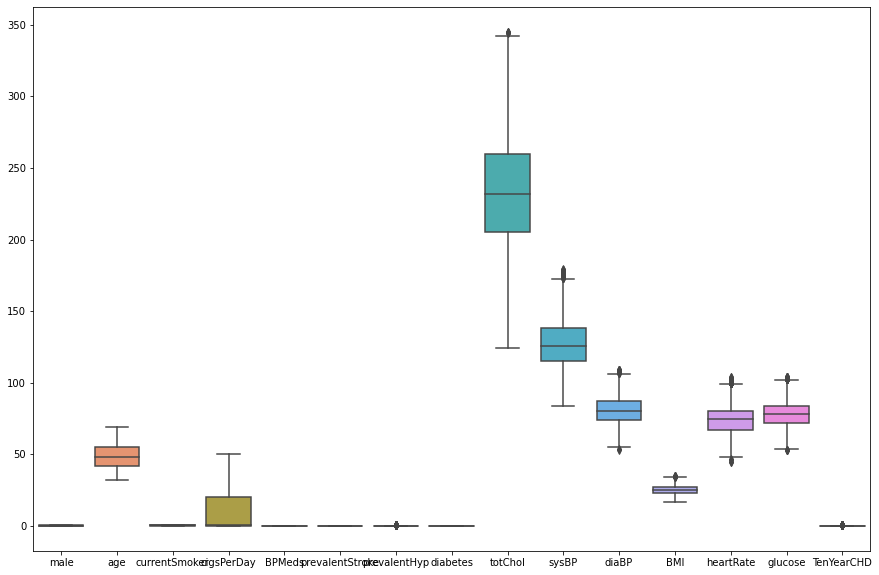

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

In [ ]:
corr_matrix_new=data.corr()

In [ ]:
corr_matrix['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

In [ ]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data['diabetes'].value_counts()

0    3435
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

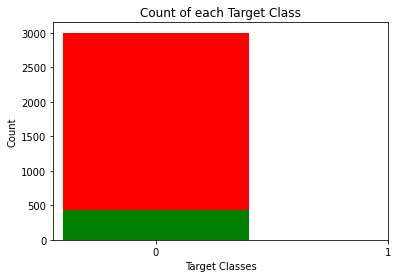

In [ ]:
# rcParams['figure.figsize'] = 8,6
plt.bar(data['diabetes'].unique(), data["TenYearCHD"].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Classifying the features into categorical and continous.

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
male : [1 0]
--------------------
age : [39 46 48 61 63 45 52 43 50 38 41 42 44 47 60 35 36 59 54 56 49 51 62 40
 67 53 57 37 66 65 64 55 58 34 68 33 32 69]
--------------------
currentSmoker : [0 1]
--------------------
cigsPerDay : [ 0.         20.         30.         23.         15.          9.
 10.          5.         35.         43.          1.         40.
  3.          2.          9.00095057 12.          4.         18.
 25.         14.         45.         50.         13.         11.
  7.          8.          6.         38.         29.         17.
 16.         19.        ]
--------------------
BPMeds : [0.]
--------------------
prevalentStroke : [0]
--------------------
prevalentHyp : [0 1]
--------------------
diabetes : [0]
--------------------
totChol : [195.         250.         245.         225.         285.
 205.         313.         260.         254.         247.
 294.         226.         221.         232.         291.
 190.         185.         215.  

In [ ]:
categorical_val

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
continous_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
categorical_val.remove('TenYearCHD')
data = pd.get_dummies(data, columns = categorical_val)
data.head(6)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_0,male_1,currentSmoker_0,currentSmoker_1,BPMeds_0.0,prevalentStroke_0,prevalentHyp_0,prevalentHyp_1,diabetes_0
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,1,0,1,1,1,0,1
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,1,0,1,1,1,0,1
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,0,1,1,1,1,0,1
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0,0,1,1,1,0,1,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,0,0,1,1,1,1,0,1
6,63,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1,1,0,1,0,1,1,1,0,1


In [ ]:
sc = StandardScaler()
col_to_scale = continous_val
data[col_to_scale] = sc.fit_transform(data[col_to_scale])
data.head(6)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_0,male_1,currentSmoker_0,currentSmoker_1,BPMeds_0.0,prevalentStroke_0,prevalentHyp_0,prevalentHyp_1,diabetes_0
0,-1.162376,-0.786864,-0.963510,-1.280981,-1.100324,0.489802,0.499591,-0.130663,0,0,1,1,0,1,1,1,0,1
1,-0.329261,-0.786864,0.422205,-0.399048,0.003462,1.008185,1.890493,-0.231767,0,1,0,1,0,1,1,1,0,1
2,-0.091229,0.923601,0.296231,-0.016877,-0.096883,0.009709,0.035957,-0.838396,0,0,1,0,1,1,1,1,0,1
3,1.455985,1.778833,-0.207665,1.306023,1.408280,0.964005,-0.891311,2.498060,1,1,0,0,1,1,1,0,1,1
4,-0.329261,1.180170,1.304024,0.130112,0.304494,-0.650051,0.963225,0.678175,0,1,0,0,1,1,1,1,0,1
6,1.694017,-0.786864,-0.711562,0.600476,-0.999980,2.298251,-1.354945,0.678175,1,1,0,1,0,1,1,1,0,1


In [ ]:
data['TenYearCHD']=data['TenYearCHD'].astype(float)

In [ ]:
data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_0,male_1,currentSmoker_0,currentSmoker_1,BPMeds_0.0,prevalentStroke_0,prevalentHyp_0,prevalentHyp_1,diabetes_0
0,-1.162376,-0.786864,-0.963510,-1.280981,-1.100324,0.489802,0.499591,-0.130663,0.0,0,1,1,0,1,1,1,0,1
1,-0.329261,-0.786864,0.422205,-0.399048,0.003462,1.008185,1.890493,-0.231767,0.0,1,0,1,0,1,1,1,0,1
2,-0.091229,0.923601,0.296231,-0.016877,-0.096883,0.009709,0.035957,-0.838396,0.0,0,1,0,1,1,1,1,0,1
3,1.455985,1.778833,-0.207665,1.306023,1.408280,0.964005,-0.891311,2.498060,1.0,1,0,0,1,1,1,0,1,1
4,-0.329261,1.180170,1.304024,0.130112,0.304494,-0.650051,0.963225,0.678175,0.0,1,0,0,1,1,1,1,0,1


Spliting the data for training and testing

In [ ]:
X=data.drop('TenYearCHD',axis=1)
y=data['TenYearCHD']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(2748, 17)

Training the model 

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
data['TenYearCHD'].value_counts()

0.0    3000
1.0     435
Name: TenYearCHD, dtype: int64

In [ ]:

print(model.score(X_train,y_train))
logScore=model.score(X_test,y_test)

0.8740902474526928


In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [ ]:
knn_scores[-1]

0.8704512372634643

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
rf_scores[-1]

0.8733624454148472

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
dt_scores[-1]

0.7889374090247453

In [ ]:
print("ALL SCORES")
print('Logistic Regression : {:.2f}%'.format(logScore*100))
print('KNN Classifier : {:.2f}%'.format(knn_scores[-1]*100))
print('Random Forest Classifier : {:.2f}%'.format(rf_scores[-1]*100))
print('Decision Tree Classifier : {:.2f}%'.format(dt_scores[-1]*100))

ALL SCORES
Logistic Regression : 87.48%
KNN Classifier : 87.05%
Random Forest Classifier : 87.34%
Decision Tree Classifier : 78.89%
